# Geometric Objects - Spatial Data Model

## Overview of geometric objects - Simple Features Implementation in Shapely

![](SpatialDataModel.png)

Fundamental geometric objects that can be used in Python with 
[Shapely](https://shapely.readthedocs.io/en/latest/) module

The most fundamental geometric objects are **Points**, **Lines** and
**Polygons** which are the basic ingredients when working with spatial
data in vector format. Python has a specific module called
[Shapely](https://shapely.readthedocs.io/en/latest/) that can be used to
create and work with *Geometric Objects*. There are many useful
functionalities that you can do with Shapely such as:

- Create a **Line** or **Polygon** from a *Collection* of **Point** geometries
- Calculate areas/length/bounds etc. of input geometries
- Make geometric operations based on the input geometries such as **Union**, **Difference**, **Distance** etc.
- Make spatial queries between geometries such **Intersects**, **Touches**, **Crosses**, **Within** etc.

**Geometric Objects consist of coordinate tuples where:**

- **Point** -object represents a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).
- **LineString** -object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples
- **Polygon** -object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons.

**It is also possible to have a collection of geometric objects (e.g. Polygons with multiple parts):**

- **MultiPoint** -object represents a collection of points and consists of a list of coordinate-tuples
- **MultiLineString** -object represents a collection of lines and consists of a list of line-like sequences
- **MultiPolygon** -object represents a collection of polygons that consists of a list of polygon-like sequences that construct from exterior ring and (possible) hole list tuples

## Point

Creating point is easy, you pass x and y coordinates into Point()-object (+ possibly also z -coordinate):

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

# What is the type of the point? point_type = type(point1)

Let's see what the variables look like.

In many cases the `print()` function is useful for showing the content, that is, a text representation, of a variable.
In jupyter notebooks (.ipynb) the `display()` function is useful for showing the content of a variable,
but the output of the `display()` function often adds additional visual information. This depends on the type of the variable and the libraries used,
how much they are adapted for use in jupyter notebooks.


In [2]:
print(point1)
print(point3D)
print(type(point1))

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>


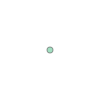

In [3]:
display(point1)

We can see that the type of the point is shapely's Point which is
represented in a specific format that is based on the
[GEOS](https://https://libgeos.org/) C++ library that is one of the
standard libraries in GIS. GEOS, a port of the Java Topology Suite
(JTS), is the geometry engine of the PostGIS spatial extension for the
PostgreSQL RDBMS. The designs of JTS and GEOS are largely guided by the
[Open Geospatial Consortium's](http://www.ogc.org/) [Simple Features Access Specification](https://www.opengeospatial.org/standards/sfa). It runs
under the hood e.g. in [QGIS](http://www.qgis.org/en/site/). 3D-points
can be recognized from the capital Z -letter in front of the
coordinates.

### Point attributes and functions

Point -object has some built-in attributes that can be accessed and also
some useful functionalities. One of the most useful ones are the ability
to extract the coordinates of a Point and calculate the Euclidian
distance between points.

Extracting the coordinates of a Point can be done in a couple of
different ways

In [4]:
# Get the coordinates

point_coords = point1.coords

# What is the type of this?
print(type(point_coords))

<class 'shapely.coords.CoordinateSequence'>


Ok, we can see that the output is a Shapely CoordinateSequence. Let's
see how we can get out the actual coordinates:

In [5]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1 
x = point1.x

# Whatabout y coordinate? 
y = point1.y

- What is inside?

In [6]:
print(xy)
print(x)
print(y)

(array('d', [2.2]), array('d', [4.2]))
2.2
4.2


Okey, so we can see that the our xy variable contains a tuple where x
and y are stored inside of a numpy arrays. However, our x and y
variables are plain decimal numbers.

- It is also possible to calculate the distance between points which can be useful in many applications
- the returned distance is based on the projection of the points (degrees in WGS84, meters in UTM)

In [7]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


### Side note on distances in GIS

In Shapely the distance is the Euclidean Distance or Linear distance
between two points on a plane. However, if we want to calculate the real
distance on Earth's surface, we need to calculate the distance on a
sphere. The radius of Earth at the equator is 6378 kilometers, according
to NASA's Goddard Space Flight Center, and Earth's polar radius is
6,356 km - a difference of 22 km. In order to approximate Earth size as
a simple sphere we use these as radius. In order to calculate the
distance in more human understandable values we need some math:

In [8]:
# law of cosines - determines the great-circle distance between two
# points on a sphere given their longitudes and latitudes based on "basic math"

import math

distance = math.acos(math.sin(math.radians(point1.y))*math.sin(math.radians(point2.y))+math.cos(math.radians(point1.y))*math.cos(math.radians(point2.y))*math.cos(math.radians(point2.x)-math.radians(point1.x)))*6378
print( "{0:8.4f} for equatorial radius in km".format(distance))

distance = math.acos(math.sin(math.radians(point1.y))*math.sin(math.radians(point2.y))+math.cos(math.radians(point1.y))*math.cos(math.radians(point2.y))*math.cos(math.radians(point2.x)-math.radians(point1.x)))*6356
print( "{0:8.4f} for polar radius in km".format(distance))

3306.1044 for equatorial radius in km
3294.7004 for polar radius in km


But Earth is not a perfect sphere but an bubbly space rock (geoid). The
most widely used approximations are ellipsoids. These are well-defined
simplifications for computational reasons. And the most widely used
standard ellipsoid is "WGS84". So, using PyProj with the "WGS84"
ellipsoid, we can easily calculate distances (and the angles towards
each other, aka forward and back azimuths) between initial points
(specified by lons1, lats1) and terminus points (specified by lons2,
lats2).

In [9]:
# with pyproj
import pyproj
geod = pyproj.Geod(ellps='WGS84')

angle1,angle2,distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

print ("{0:8.4f} for ellipsoid WGS84 in km".format(distance/1000))

3286.3538 for ellipsoid WGS84 in km


## LineString

Creating a LineString -object is fairly similar to how Point is
created. Now instead using a single coordinate-tuple we can
construct the line using either a list of shapely Point -objects or
pass coordinate-tuples:

In [10]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

Let's see how our LineString looks like

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
<class 'shapely.geometry.linestring.LineString'>


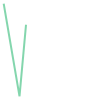

In [11]:
print(line)
print(line2)
print(type(line))

display(line)

Ok, now we can see that variable line constitutes of multiple
coordinate-pairs and the type of the data is shapely LineString.

### LineString attributes and functions

LineString -object has many useful built-in attributes and
functionalities. It is for instance possible to extract the coordinates
or the length of a LineString (line), calculate the centroid of the
line, create points along the line at specific distance, calculate the
closest distance from a line to specified Point and simplify the
geometry. See full list of functionalities from [Shapely documentation](https://shapely.readthedocs.io/en/latest/manual.html).
Here, we go through a few of them.

We can extract the coordinates of a LineString similarly as with
Point

In [12]:
# Get x and y coordinates of the line
lxy = line.xy

print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


Okey, we can see that the coordinates are again stored as a numpy arrays
where first array includes all x-coordinates and the second all the
y-coordinates respectively.

We can extract only x or y coordinates by referring to those arrays
as follows

In [13]:
# Extract x coordinates

line_x = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_y = line.xy[1]

print(line_x)

print(line_y)

array('d', [2.2, 7.2, 9.26])
array('d', [4.2, -25.1, -2.456])


We can get specific attributes such as lenght of the line and center
of the line (centroid) straight from the LineString object itself

In [14]:
# Get the lenght of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

# What type is the centroid?
centroid_type = type(l_centroid)

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", centroid_type)

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.892411157572392)
Type of the centroid: <class 'shapely.geometry.point.Point'>


Okey, so these are already fairly useful information for many different
GIS tasks, and we didn't even calculate anything yet! These attributes
are built-in in every LineString object that is created. Notice that the
centroid that is returned is Point -object that has its own functions as
was described earlier.

## Polygon

Creating a Polygon -object continues the same logic of how Point and
LineString were created but Polygon object only accepts
coordinate-tuples as input. Polygon needs at least three
coordinate-tuples:

In [15]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

# Geometry type can be accessed as a String
poly_type = poly.geom_type

# Using the Python's type function gives the type in a different format
poly_type2 = type(poly)

# Let's see how our Polygon looks like
print(poly)
print(poly2)
print("Geometry type as text:", poly_type)
print("Geometry how Python shows it:", poly_type2)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Geometry type as text: Polygon
Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


Notice that Polygon has double parentheses around the coordinates. This
is because Polygon can also have holes inside of it. As the help of
Polygon -object tells, a Polygon can be constructed using exterior
coordinates and interior coordinates (optional) where the interior
coordinates creates a hole inside the Polygon:

Help on Polygon in module shapely.geometry.polygon object:
class Polygon(shapely.geometry.base.BaseGeometry)
 |  A two-dimensional figure bounded by a linear ring
 |
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.

Let's create a Polygon with a hole inside

In [16]:
# Let's create a bounding box of the world and make a whole in it 
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

Let's see what we have now:

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
<class 'shapely.geometry.polygon.Polygon'>


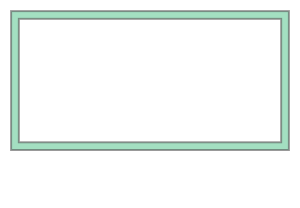

In [17]:
print(world)
print(world_has_a_hole)
print(type(world_has_a_hole))

display(world_has_a_hole)

Now we can see that the polygon has two different tuples of coordinates.
The first one represents the outerior and the second one represents the
hole inside of the Polygon.

### Polygon attributes and functions

We can again access different attributes that are really useful such
as area, centroid, bounding box, exterior, and exterior-length of
the Polygon

In [18]:
# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

Let's see what we have now

In [19]:
print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
print("Poly Exterior Length: ", world_ext_length)

Poly centroid:  POINT (0 0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


## Reading X/Y Coordinates from Text files

One of the "classical" problems in GIS is the situation where you have
a set of coordinates in a file and you need to get them into a map (or
into a GIS-software). Python is a really handy tool to solve this
problem as with Python it is basically possible to read data from any
kind of input datafile (such as csv-, txt-, excel-, or gpx-files (gps
data) or from different databases).

Python provides various helpful packages and functions to work with
data. While you could of course also manually program to open the file,
read it line by line, extract fields and process variables, we can also
use a widely used library called Pandas to read a file with tabular data
and present it to us as a so called dataframe:

With the Windows File Explorer create a folder named `L1` inside your
`geopython2023` working directory. Download the following file and save
it into that `L1` folder.

[file:global-city-population-estimates.csv](../files/data/L1/global-city-population-estimates.csv)

In [20]:
import pandas as pd

# make sure you have the correct path to your working file
# e.g. 'L1/global-city-population-estimates.csv' if you saved the file in your working directory
df = pd.read_csv('../files/data/L1/global-city-population-estimates.csv', sep=';', encoding='latin1')

# this option tells pandas to print up to 20 columns, typically a the
# print function will cut the output for better visibility 
# (depending on the size and dimension of the dataframe)
#
pd.set_option('display.max_columns',20)

display(df.head(5))

,Country or area,Urban Agglomeration,Latitude,Longitude,Population_2015,Unnamed: 5
0,Japan,Tokyo,35.689500,139.691710,38001018,NaN
1,India,Delhi,28.666670,77.216670,25703168,NaN
2,China,Shanghai,31.220000,121.460000,23740778,NaN
3,Brazil,S?o Paulo,-23.550000,-46.640000,21066245,NaN
4,India,Mumbai (Bombay),19.073975,72.880838,21042538,NaN


Now we want to process the tabular data. Thus, let's see how we can go
through our data and create Point -objects from them:

In [21]:
# we make a function, that takes a row object coming from Pandas. The
# single fields per row are addressed by their column name.
def make_point(row):
    return Point(row['Longitude'], row['Latitude'])

# Go through every row, and make a point out of its lat and lon, by
# applying the function from above (downwards row by row -> axis=1)
df['points'] = df.apply(make_point, axis=1)

display(df.head(5))

,Country or area,Urban Agglomeration,Latitude,Longitude,Population_2015,Unnamed: 5,points
0,Japan,Tokyo,35.689500,139.691710,38001018,NaN,POINT (139.69171 35.6895)
1,India,Delhi,28.666670,77.216670,25703168,NaN,POINT (77.21667 28.66667)
2,China,Shanghai,31.220000,121.460000,23740778,NaN,POINT (121.46 31.22)
3,Brazil,S?o Paulo,-23.550000,-46.640000,21066245,NaN,POINT (-46.64 -23.55)
4,India,Mumbai (Bombay),19.073975,72.880838,21042538,NaN,POINT (72.880838 19.073975)


## Geometry collections (optional)

::: {.callout-note}
This part is not obligatory but it contains some useful information
related to construction and usage of geometry collections and some
special geometric objects -such as bounding box.
:::

In some occassions it is useful to store e.g. multiple lines or polygons
under a single feature (i.e. a single row in a Shapefile represents more
than one line or polygon object). Collections of points are implemented
by using a MultiPoint -object, collections of curves by using a
MultiLineString -object, and collections of surfaces by a MultiPolygon
-object. These collections are not computationally significant, but are
useful for modeling certain kinds of features. A Y-shaped line feature
(such as road), or multiple polygons (e.g. islands on a like), can be
presented nicely as a whole by a using MultiLineString or MultiPolygon
accordingly. Creating and visualizing a minimum [bounding box](https://en.wikipedia.org/wiki/Minimum_bounding_box) e.g. around
your data points is a really useful function for many purposes (e.g.
trying to understand the extent of your data), here we demonstrate how
to create one using Shapely.

Geometry collections can be constructed in a following manner:

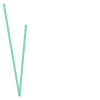

In [22]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

display(multi_line)

MultiPolygon can be done in a similar manner # Let's divide our
world into western and eastern hemispheres with a hole on the western
hemisphere:

In [23]:
# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus
# we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left
# corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects
# into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

Let's see what do we have:

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


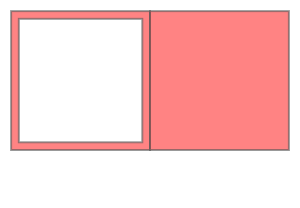

In [24]:
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

display(multi_poly)

We can see that the outputs are similar to the basic geometric objects
that we created previously but now these objects contain multiple
features of those points, lines or polygons.

### Geometry collection -objects' attributes and functions

We can also get many useful attributes from those objects:

In [25]:
# Convex Hull of our MultiPoint -->
# <https://en.wikipedia.org/wiki/Convex_hull>
convex = multi_point.convex_hull

# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line.geoms)

# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area

# We can also access different items inside our geometry collections.
# We can e.g. access a single polygon from our MultiPolygon -object by
# referring to the index

# Let's calculate the area of our Western hemisphere (with a hole)
# which is at index 0
west_area = multi_poly.geoms[0].area

# We can check if we have a "valid" MultiPolygon. MultiPolygon is
# thought as valid if the individual polygons does notintersect with
# each other. Here, because the polygons have a common 0-meridian, we
# should NOT have a valid polygon. This can be really useful
# information when trying to find topological errors from your data 
valid = multi_poly.is_valid

Let's see what do we have:

In [26]:
print("Convex hull of the points: ", convex)
print("Number of lines in MultiLineString:", lines_count)
print("Area of our MultiPolygon:", multi_poly_area)
print("Area of our Western Hemisphere polygon:", west_area)
print("Is polygon valid?: ", valid)

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))
Number of lines in MultiLineString: 2
Area of our MultiPolygon: 39200.0
Area of our Western Hemisphere polygon: 6800.0
Is polygon valid?:  False


From the above we can see that MultiPolygons have exactly the same
attributes available as single geometric objects but now the information
such as area calculates the area of ALL of the individual -objects
combined. There are also some extra features available such as
*is_valid* attribute that tells if the polygons or lines intersect with
each other.

**Launch in the web/MyBinder:**

[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/allixender/testgeo2021a/main?filepath=L1%2Flesson1.ipynb)

**Acknowledgments:**

These materials are partly based on [Shapely-documentation](https://shapely.readthedocs.io/en/latest/) and
[Westra E. (2016), Chapter 3](https://www.packtpub.com/eu/application-development/python-geospatial-development-third-edition).
